# 欄位介紹
### InvoiceNo: 發票號碼. 唯一值, "C"開頭代表該交易取消
### ItemCode: 產品代碼, 每個產品的唯一值
### DescriptionCode: 商品敘述代碼
### Quantity: 每個商品數量
### SellDate: 發票產生時間, 代表每筆交易發生的日期跟時間
### NewTaiwanDollors: 物品單價
### CustomerID: 用戶代碼, 唯一值
### District: 銷售縣市

### Q1:非監督式學習

### Q2:

In [51]:
import sqlite3
import pandas as pd

with sqlite3.connect('./ecommerce.db') as con:
# read_sql_query和read_sql都能通過SQL語句從資料庫檔案中獲取資料資訊
    df = pd.read_sql_query("SELECT * FROM ecommerce", con=con)
    # df.to_excel('./ecommerce.xlsx')

# print(df.shape)
# print(df.info())
df.head()


InvoiceNo ItemCode DescriptionCode  Quantity        SellDate  \
0    536365   85123A         1546686         6  12/1/2018 8:26   
1    536365    71053         1466048         6  12/1/2018 8:26   
2    536365   84406B         4510747         8  12/1/2018 8:26   
3    536365   84029G         6497318         6  12/1/2018 8:26   
4    536365   84029E         3876120         6  12/1/2018 8:26   

   NewTaiwanDollors  CustomerID             District  
0             255.0     17850.0  Zhongzheng District  
1             339.0     17850.0  Zhongzheng District  
2             275.0     17850.0  Zhongzheng District  
3             339.0     17850.0  Zhongzheng District  
4             339.0     17850.0  Zhongzheng District

### Q3: 

In [52]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   InvoiceNo         541909 non-null  object 
 1   ItemCode          541909 non-null  object 
 2   DescriptionCode   540455 non-null  object 
 3   Quantity          541909 non-null  int64  
 4   SellDate          541909 non-null  object 
 5   NewTaiwanDollors  541909 non-null  float64
 6   CustomerID        406829 non-null  float64
 7   District          541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Quantity  NewTaiwanDollors     CustomerID
count  541909.000000      5.419090e+05  406829.000000
mean        9.552250      4.611114e+02   15287.690570
std       218.081158      9.675985e+03    1713.600303
min    -80995.000000     -1.106206e+06   12346.000000
25%         1.000000      1.250000e+02   13953.000000
50%         3.000000      2.080000e+02   15152.000000
75%        10.000000      4.130000e+02   16791.000000
max     80995.000000      3.897000e+06   18287.000000

Text(0.5, 0, 'Log-NewTaiwanDollors')

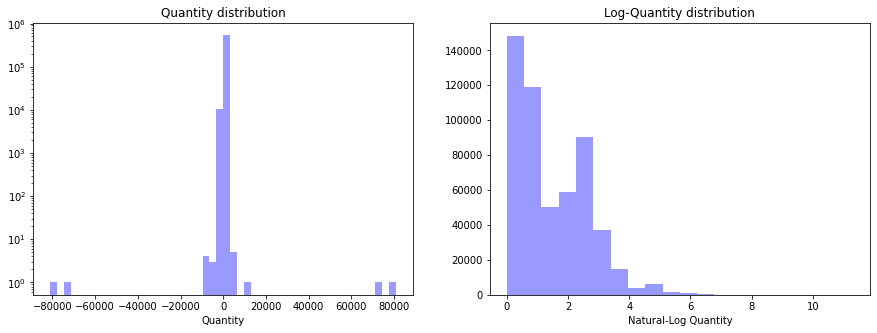

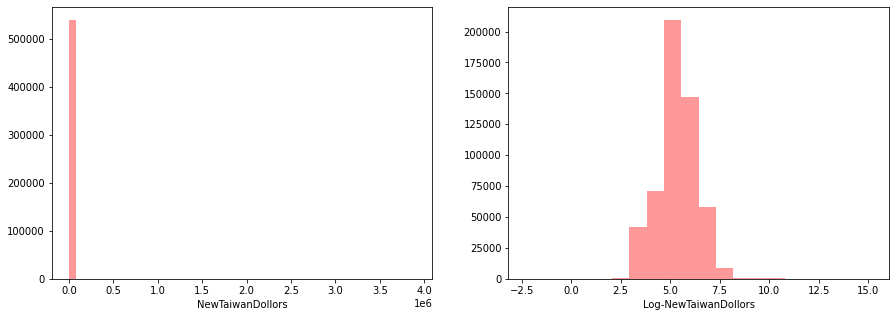

In [53]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.distplot(df.Quantity, ax=ax[0], kde=False, color="blue")
sns.distplot(np.log(df.Quantity), ax=ax[1], bins=20, kde=False, color="blue")
ax[0].set_title("Quantity distribution")
ax[0].set_yscale("log")
ax[1].set_title("Log-Quantity distribution")
ax[1].set_xlabel("Natural-Log Quantity")

data = df.loc[df.NewTaiwanDollors > 0].copy() #避免inf

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.distplot(data.NewTaiwanDollors, ax=ax[0], kde=False, color="red")
sns.distplot(np.log(data.NewTaiwanDollors), ax=ax[1], bins=20, color="red", kde=False)
ax[1].set_xlabel("Log-NewTaiwanDollors")

### Q3.1:
### 1.Quantity呈現右尾分佈，並且標準差大(離群值差異大)
### 2.NewTaiwanDollors分布狀況較集中

### Q3.2:
### 由3.1資料分布的情況來看，預計做下列資料預處理

### -----For rawdata-----
### 1. CustomerID:將無CustomerID的資料去除（處理缺失值）
### 2. Quantity:若是負數可能是退貨交易，故將Quantity<=0資料去除,以便後續做銷售商品數量分析
### 3. 利用Quantity*NewTaiwanDollors新增總銷售額
### 4. 利用SellDate欄位新增銷售月份、銷售時間點，以便看銷售趨勢
### 最後確認資料是否還有空值


### -----Groupby CustomerID (RFM模型)----- 
### 1.找到每位客戶的最近一次消費(R)
### 2.找到每位客戶的交易次數(F)
### 3.找到每位客戶的總花費(M)


### Data Analyzing For Rawdata

In [54]:
df[df['CustomerID'].isnull().values==True]

InvoiceNo ItemCode DescriptionCode  Quantity         SellDate  \
622       536414    22139            None        56  12/1/2018 11:52   
1443      536544    21773         1906416         1  12/1/2018 14:32   
1444      536544    21774         1057867         2  12/1/2018 14:32   
1445      536544    21786         7602580         4  12/1/2018 14:32   
1446      536544    21787         6518295         2  12/1/2018 14:32   
...          ...      ...             ...       ...              ...   
541536    581498   85099B         9096041         5  12/9/2011 10:26   
541537    581498   85099C         8560199         4  12/9/2011 10:26   
541538    581498    85150         5648308         1  12/9/2011 10:26   
541539    581498    85174         5929834         1  12/9/2011 10:26   
541540    581498      DOT         6564284         1  12/9/2011 10:26   

        NewTaiwanDollors  CustomerID             District  
622                  0.0         NaN  Zhongzheng District  
1443               251.0         NaN  Zhongzheng District  
1444               251.0         NaN  Zhongzheng District  
1445                85.0         NaN  Zhongzheng District  
1446               166.0         NaN  Zhongzheng District  
...                  ...         ...                  ...  
541536             413.0         NaN  Zhongzheng District  
541537             413.0         NaN  Zhongzheng District  
541538             496.0         NaN  Zhongzheng District  
541539            1079.0         NaN  Zhongzheng District  
541540          171417.0         NaN  Zhongzheng District  

[135080 rows x 8 columns]

In [55]:
df_notnull = df.dropna(subset=["CustomerID"])  
# df_notnull.describe()

In [56]:
# Remove Quantity with negative values
df_new = df_notnull[df_notnull.Quantity > 0]
df_new.info()
# df_new.describe()
# df_new.to_excel('./ecommerce_new.xlsx')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   InvoiceNo         397924 non-null  object 
 1   ItemCode          397924 non-null  object 
 2   DescriptionCode   397924 non-null  object 
 3   Quantity          397924 non-null  int64  
 4   SellDate          397924 non-null  object 
 5   NewTaiwanDollors  397924 non-null  float64
 6   CustomerID        397924 non-null  float64
 7   District          397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [57]:
#Add Total_spent
df_new['Total_spent'] = df_new['Quantity'] * df_new['NewTaiwanDollors']

In [58]:
from datetime import datetime
df_new['New_SellDate'] = df_new['SellDate'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y %H:%M'))

In [59]:
df_new['month'] = df_new['New_SellDate'].apply(lambda x: x.month)
df_new['hour'] = df_new['New_SellDate'].apply(lambda x: x.hour)
df_new['weekday'] = df_new['New_SellDate'].apply(lambda x: x.dayofweek+1)

In [60]:
print(df_new.isnull().any())
df_new.describe()
# df_new.to_excel('./ecommerce_process.xlsx')

InvoiceNo           False
ItemCode            False
DescriptionCode     False
Quantity            False
SellDate            False
NewTaiwanDollors    False
CustomerID          False
District            False
Total_spent         False
New_SellDate        False
month               False
hour                False
weekday             False
dtype: bool


Quantity  NewTaiwanDollors     CustomerID   Total_spent  \
count  397924.000000     397924.000000  397924.000000  3.979240e+05   
mean       13.021823        311.617448   15294.315171  2.239475e+03   
std       180.420210       2209.678803    1713.169877  3.090556e+04   
min         1.000000          0.000000   12346.000000  0.000000e+00   
25%         2.000000        125.000000   13969.000000  4.680000e+02   
50%         6.000000        195.000000   15159.000000  1.180000e+03   
75%        12.000000        375.000000   16795.000000  1.980000e+03   
max     80995.000000     814275.000000   18287.000000  1.684696e+07   

               month           hour        weekday  
count  397924.000000  397924.000000  397924.000000  
mean        7.612537      12.728247       3.673810  
std         3.416527       2.273535       1.946119  
min         1.000000       6.000000       1.000000  
25%         5.000000      11.000000       2.000000  
50%         8.000000      13.000000       4.000000  
75%        11.000000      14.000000       5.000000  
max        12.000000      20.000000       7.000000

In [82]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=df_new.Quantity),row=1, col=1)
fig.add_trace(go.Box(y=df_new.NewTaiwanDollors),row=1, col=2)

fig.update_xaxes(title_text="Quantity", row=1, col=1)
fig.update_xaxes(title_text="NewTaiwanDollors", row=1, col=2)

fig.update_layout(height=500, width=500)
fig.show()

### 處理後的資料已無缺失值

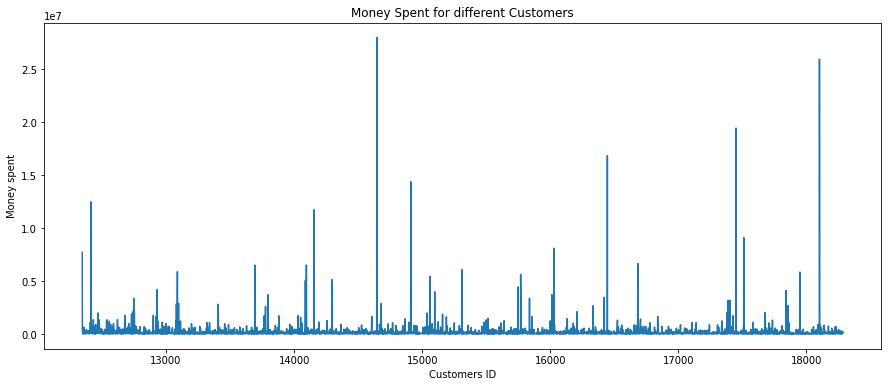

Text(0.5, 1.0, 'TOP 10 Customers by Total_price')

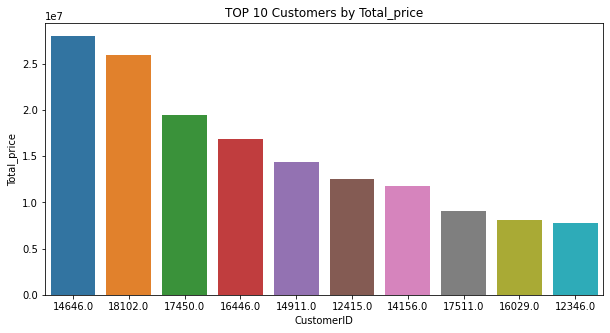

In [61]:
money_spent = df_new.groupby(by=['CustomerID','District'], as_index=False)['Total_spent'].sum()
plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.Total_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent')
plt.title('Money Spent for different Customers')
plt.show()

money_spent = df_new.groupby('CustomerID')['Total_spent'].sum().sort_values(ascending=False).iloc[0:10]
plt.figure(figsize=(10,5))
sns.barplot(money_spent.index, money_spent.values, order=money_spent.index)
plt.ylabel("Total_price")
plt.xlabel("CustomerID")
plt.title("TOP 10 Customers by Total_price")


Text(0.5, 1.0, 'TOP 10 ItemCode by Quantity')

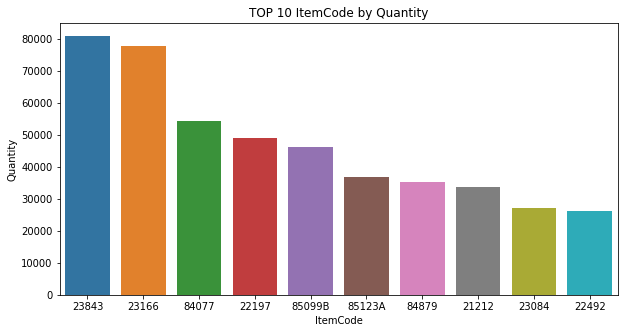

In [63]:
ItemCode_Quantity = df_new.groupby('ItemCode')['Quantity'].sum().sort_values(ascending=False).iloc[0:10]

plt.figure(figsize=(10,5))
sns.barplot(ItemCode_Quantity.index, ItemCode_Quantity.values, order=ItemCode_Quantity.index)
plt.ylabel("Quantity")
plt.xlabel("ItemCode")
plt.title("TOP 10 ItemCode by Quantity")

In [23]:
# customer_counts = df_new.CustomerID.value_counts().sort_values(ascending=False).iloc[0:10] 
# plt.figure(figsize=(10,5))
# sns.barplot(customer_counts.index, customer_counts.values, order=customer_counts.index)
# plt.ylabel("Counts")
# plt.xlabel("CustomerID")
# plt.title("TOP 10 customers by most common order")

# district_spent = df_new.groupby('District')['Total_spent'].sum().sort_values(ascending=False).iloc[0:10]
# plt.figure(figsize=(10,5))
# sns.barplot(district_spent.index, district_spent.values, order=district_spent.index)
# plt.ylabel("Total_price")
# plt.xlabel("District")
# plt.title("TOP 10 district by Total_price")

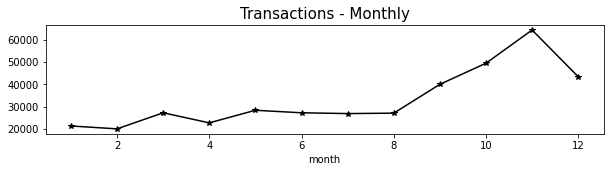

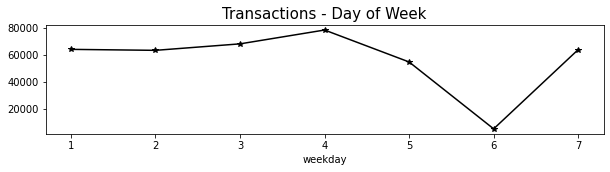

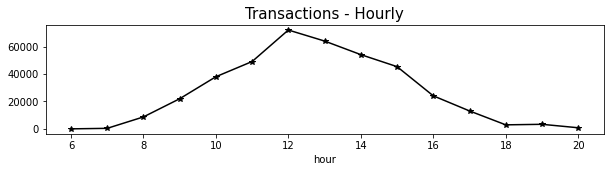

In [65]:
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

# Transaction trend across months
month = df_new.groupby('month')['Total_spent'].count()
plt.figure(figsize=(10,2))
month.plot(marker='*',color='k')
plt.title("Transactions - Monthly", size=15)
plt.show()

# Transaction trend in day of week
weekday = df_new.groupby('weekday')['Total_spent'].count()
plt.figure(figsize=(10,2))
weekday.plot(marker='*',color='k')
plt.title("Transactions - Day of Week", size=15)
plt.show()

# Transaction trend in hour of the day
hour = df_new.groupby('hour')['Total_spent'].count()
plt.figure(figsize=(10,2))
hour.plot(marker='*', color='k')
plt.title("Transactions - Hourly", size=15)
plt.show()

### 1.若將一年分為Q1~Q4的話，Q4的銷售額最佳
### 2.週六的銷售額最差
### 3.大多的人會在10:00~15:00下訂單

### Data Analyzing For CustomerID

In [66]:
df_new.head()
df3 = df_new.copy()
df3.head()

InvoiceNo ItemCode DescriptionCode  Quantity        SellDate  \
0    536365   85123A         1546686         6  12/1/2018 8:26   
1    536365    71053         1466048         6  12/1/2018 8:26   
2    536365   84406B         4510747         8  12/1/2018 8:26   
3    536365   84029G         6497318         6  12/1/2018 8:26   
4    536365   84029E         3876120         6  12/1/2018 8:26   

   NewTaiwanDollors  CustomerID             District  Total_spent  \
0             255.0     17850.0  Zhongzheng District       1530.0   
1             339.0     17850.0  Zhongzheng District       2034.0   
2             275.0     17850.0  Zhongzheng District       2200.0   
3             339.0     17850.0  Zhongzheng District       2034.0   
4             339.0     17850.0  Zhongzheng District       2034.0   

         New_SellDate  month  hour  weekday  
0 2018-12-01 08:26:00     12     8        6  
1 2018-12-01 08:26:00     12     8        6  
2 2018-12-01 08:26:00     12     8        6  
3 2018-12-01 08:26:00     12     8        6  
4 2018-12-01 08:26:00     12     8        6

In [67]:
a = df3.groupby('CustomerID').sum()['Total_spent']
a = a.reset_index()

b = df3.groupby('CustomerID')['InvoiceNo'].count()
b = b.reset_index()

df_temp = pd.merge(a, b, on='CustomerID', how='inner')
# df_temp.head()

In [68]:
max_date = df3['New_SellDate'].max()
max_date

Timestamp('2018-12-23 16:06:00')

In [71]:
df3['days_diff'] = max_date - df3['New_SellDate']
df3.head()

InvoiceNo ItemCode DescriptionCode  Quantity        SellDate  \
0    536365   85123A         1546686         6  12/1/2018 8:26   
1    536365    71053         1466048         6  12/1/2018 8:26   
2    536365   84406B         4510747         8  12/1/2018 8:26   
3    536365   84029G         6497318         6  12/1/2018 8:26   
4    536365   84029E         3876120         6  12/1/2018 8:26   

   NewTaiwanDollors  CustomerID             District  Total_spent  \
0             255.0     17850.0  Zhongzheng District       1530.0   
1             339.0     17850.0  Zhongzheng District       2034.0   
2             275.0     17850.0  Zhongzheng District       2200.0   
3             339.0     17850.0  Zhongzheng District       2034.0   
4             339.0     17850.0  Zhongzheng District       2034.0   

         New_SellDate  month  hour  weekday        days_diff  
0 2018-12-01 08:26:00     12     8        6 22 days 07:40:00  
1 2018-12-01 08:26:00     12     8        6 22 days 07:40:00  
2 2018-12-01 08:26:00     12     8        6 22 days 07:40:00  
3 2018-12-01 08:26:00     12     8        6 22 days 07:40:00  
4 2018-12-01 08:26:00     12     8        6 22 days 07:40:00

In [72]:
c = df3.groupby('CustomerID')['days_diff'].min()
c = c.reset_index()

c['days_diff'] = c['days_diff'].dt.days
c.head()
c.head()

CustomerID  days_diff
0     12346.0       2896
1     12347.0         16
2     12348.0          6
3     12349.0       2589
4     12350.0       2881

In [73]:
df_rfm = pd.merge(df_temp, c, on='CustomerID', how='inner')
df_rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
print(df_rfm.info())
df_rfm.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 0 to 4338
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   float64
 1   Amount      4339 non-null   float64
 2   Frequency   4339 non-null   int64  
 3   Recency     4339 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 169.5 KB
None


CustomerID     Amount  Frequency  Recency
0     12346.0  7718360.0          1     2896
1     12347.0   431000.0        182       16
2     12348.0   179724.0         31        6
3     12349.0   175755.0         73     2589
4     12350.0    33440.0         17     2881

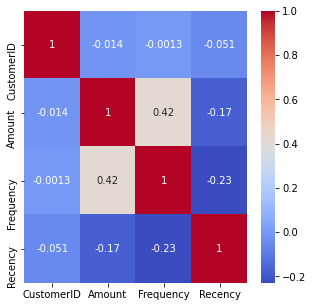

In [74]:
plt.figure(figsize=(5, 5))
sns.heatmap(df_rfm.corr(),cmap='coolwarm',annot=True)
plt.show()

### Q3.3:
### 1.因為題目主要規劃行銷策略用在哪些用戶上，所以資料選用整理每位客戶的總花費、交易頻率、最近一次消費的變數做分析，而不單純選用rawdata變數
### 2.且總花費、交易頻率、最近一次消費的特徵變數之前的相關性較原本rawdata變數高，對後續分析更為準確

### Q4:

In [75]:
from sklearn.preprocessing import StandardScaler

df_rfm_temp = df_rfm[['Amount','Frequency','Recency']]
scaled_features = StandardScaler().fit_transform(df_rfm_temp.values)
df_rfm_scaled = pd.DataFrame(scaled_features, index=df_rfm_temp.index, columns=df_rfm_temp.columns)
df_rfm_scaled.head()

Amount  Frequency   Recency
0  8.359634  -0.396512  0.723683
1  0.251046   0.394688 -1.966199
2 -0.028546  -0.265374 -1.975539
3 -0.032963  -0.081781  0.436949
4 -0.191315  -0.326572  0.709673

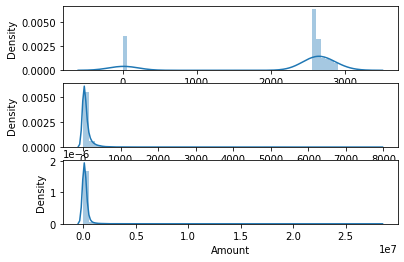

In [76]:
# Visualise the obtained results
plt.subplot(3, 1, 1)
sns.distplot(df_rfm['Recency'])

plt.subplot(3, 1, 2)
sns.distplot(df_rfm['Frequency'])

plt.subplot(3, 1, 3)
sns.distplot(df_rfm['Amount'])

plt.show()

### Q4.1:
### 如上圖所示，資料均勻分佈在聚類中，故使用kmeans做分群，且資料變數不多，先用最基本分群演算法來看

num_clusters  cluster_errors
0              1    13017.000000
1              2     8314.997343
2              3     4523.848026
3              4     3055.741012
4              5     2278.704964
5              6     1789.883309
6              7     1495.293168
7              8     1294.394632
8              9     1128.292998
9             10     1007.868443
10            11      895.803813
11            12      789.581909
12            13      701.918631
13            14      616.896179


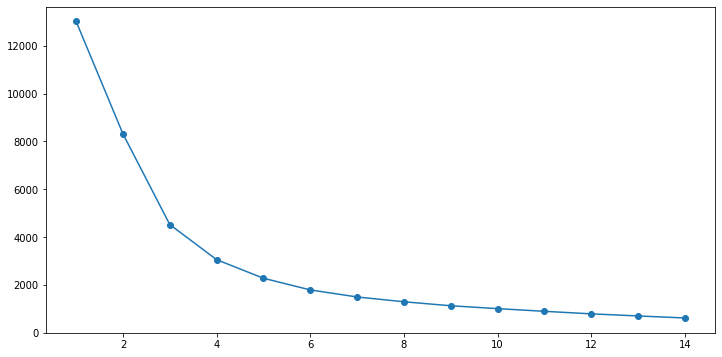

In [77]:
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=2)
kmeans.fit(df_rfm_scaled)

cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 10 )
    clusters.fit(df_rfm_scaled)
    cluster_errors.append( clusters.inertia_ )
df_clusters = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
print(df_clusters[0:15])

plt.figure(figsize=(12,6))
plt.plot( df_clusters.num_clusters, df_clusters.cluster_errors, marker = "o" )

In [81]:
means = KMeans(n_clusters=3, n_init = 15, random_state=2)
kmeans.fit(df_rfm_scaled)
centroids = kmeans.cluster_centers_
df_centroid = pd.DataFrame(centroids, columns = list(df_rfm_scaled) )
df_centroid

Amount  Frequency   Recency
0   0.182844   0.315092 -1.967085
1  -0.098444  -0.120761  0.504819
2  13.804560  10.815795 -1.419960

### Q4.2:
### 從上圖群集誤差圖中可以看出，群集3與其他群集相比，誤差降低最多，且看曲線彎曲的地方也是群集3，因此我們可以將客戶分為3個群集。

### 群集0的客戶:屬於舊客戶且不經常購買商品，交易量中等。
### 集群1的客戶:應該是屬於新客戶且推論是有促銷活動才有意願購買的客戶，交易頻率最低，交易量最少。
### 集群2的客戶:應該是忠誠的客戶，因為他們交易量大且經常購買商品。 

### Q5.1:
### 預計使用分類模型來驗證分群效果
### 分類模型有Logistic Regression、SVM、Decision Tree、Random Forest、Gradient Boosting Classifier...等

### Q5.2:
### 打算使用Logistic Regression做驗證
### 1.因為目前特徵不多，適合使用Logistic Regression
### 2.解決共線性較佳
### 3.可用較少的資源處理資料


### Q5.3:
### 1.將分群的結果新增一個欄位(如下labels欄位)
### 2.將資料拆成測試集及驗證集
### 3.利用confusion_matrix驗證分類效果好壞

In [79]:
df_pred = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_pred['labels'] = df_pred['labels'].astype('category')

df_kmeans = df_rfm.join(df_pred)
df_kmeans.head()
# df_kmeans.info()

CustomerID     Amount  Frequency  Recency labels
0     12346.0  7718360.0          1     2896      1
1     12347.0   431000.0        182       16      0
2     12348.0   179724.0         31        6      0
3     12349.0   175755.0         73     2589      1
4     12350.0    33440.0         17     2881      1

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X = df_kmeans[['Amount','Frequency','Recency']]
Y = df_kmeans[["labels"]]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
clf1 = LogisticRegression()
clf1.fit(x_train, y_train)
y_pred = clf1.predict(x_test)
# print('預測答案',y_pred)

acc = accuracy_score(y_pred, y_test)
print('準確度', acc)

cm = confusion_matrix(y_test, y_pred)
print('混淆矩陣', cm)

準確度 0.9608294930875576
混淆矩陣 [[156  29   4]
 [  0 677   0]
 [  1   0   1]]


### Q6:
### 效果不如預期原因為：
### 1.特徵值選錯，導致分群效果不佳
### 2.特徵變數過少，預期可以
### 3.此資料分佈不是使用kmeans做分群，可以改用階層式分群(Hierarchical clustering)或密度聚類的演算法(DBSCAN)